In [1]:
import torch

import numpy as np
import matplotlib.pyplot as plt

# Import utils scripts to train, visualize VAEs
import utils

In [2]:
print(torch.__version__)
torch.cuda.is_available()

1.7.0


False

In [3]:
device = "cpu" # change to device = "cuda" if a cuda GPU is available

### 1. Unit Test 1

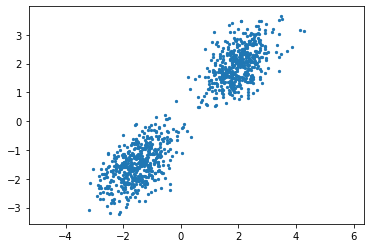

In [4]:
# Prepare x_train
c_means = [[-1.5, -1.5], [2.0, 2.0]]
c_var = 0.30**2
x_var = 1e-2

indices = np.random.randint(2, size=1000)
samples = [np.random.multivariate_normal(c_means[i], c_var * np.eye(2) + 0.2 * np.ones((2, 2))) + np.random.multivariate_normal(np.zeros(2), x_var**0.5 * np.eye(2)) for i in indices]

x_train = np.array(samples)
plt.scatter(x_train[:, 0], x_train[:, 1], s=5.0)
plt.axis('equal')
plt.show()

100%|██████████| 5000/5000 [01:12<00:00, 69.37it/s]


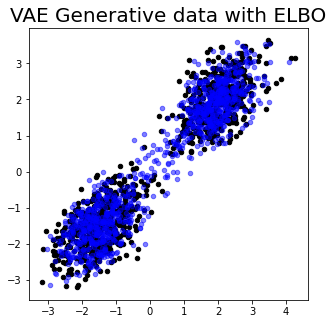

In [6]:
# Train with ELBO, and visualize 
# Most arguments of the following functions have reasonable default settings, i list them all here for a pedagogical reason
elbo_vae_instance = utils.train_ELBO_VAE_batched(x_train, 
                                                 x_var=x_var,
                                                 z_dim=2,
                                                 width=50,
                                                 hidden_layers=1,
                                                 learning_rate=0.01,
                                                 S=10,
                                                 n_epochs=5000,
                                                 report_iter=50,
                                                 batch_size=256,
                                                 device=device)
utils.visualize_VAE(elbo_vae_instance, 
                    x_train, 
                    "ELBO", 
                    x_var=x_var,
                    number_samples=1000,
                    figsize=(5,5))

100%|██████████| 5000/5000 [00:49<00:00, 100.76it/s]


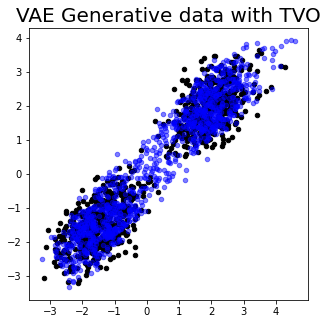

In [7]:
# Train with TVO, and visualize 
tvo_vae_instance = utils.train_TVO_VAE_batched(x_train,
                                                x_var=x_var,
                                                z_dim=2,
                                                width=50,
                                                hidden_layers=1,
                                                learning_rate=0.01,
                                                partition=torch.tensor([0.0,0.25,0.50,0.75,1.0]),
                                                S=10,
                                                n_epochs=5000,
                                                report_iter=50,
                                                batch_size=256,
                                                device=device)
utils.visualize_VAE(tvo_vae_instance,
                    x_train, 
                    "TVO",
                    x_var=x_var,
                    number_samples=1000, 
                    figsize=(5,5))

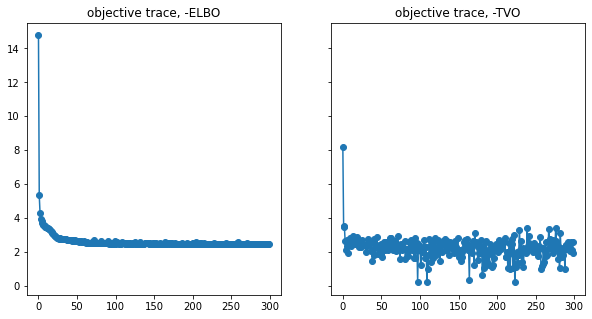

In [10]:
# Plot out the loss function trace
fig, ax=plt.subplots(1,2, figsize=(10,5), sharey=True)
ax[0].plot(elbo_vae_instance.objective_trace, 'o-')
ax[0].set_title('objective trace, -ELBO')
ax[1].plot(tvo_vae_instance.objective_trace, 'o-')
ax[1].set_title('objective trace, -TVO')
plt.show()

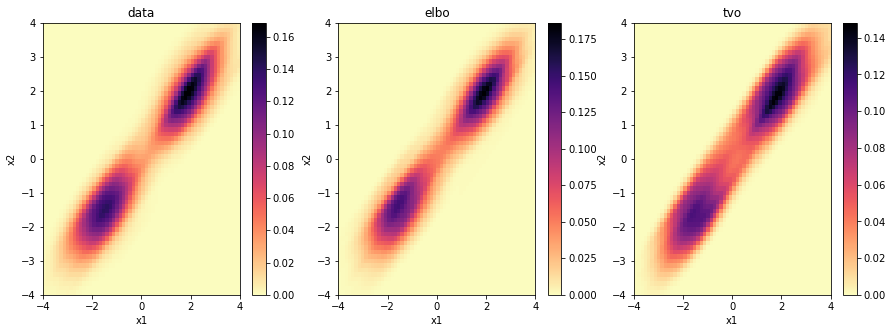

In [22]:
# Visualize PDF by a helper function
utils.compare_VAE(elbo_vae_instance, tvo_vae_instance, x_train,
                 number_samples=2000, x_var=x_var,
                 lim=4,
                 c_map='magma_r')

### 2. Unit test 2

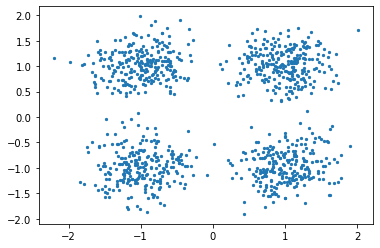

In [23]:
# Prepare x_train
c_means = [[-1.0, -1.0], [1.0, 1.0], [1.0, -1.0], [-1.0, 1.0]]
c_var = 0.05**2
x_var = 1e-2

indices = np.random.randint(4, size=1000)
samples = [np.random.multivariate_normal(c_means[i], c_var * np.eye(2) + 0.01 * np.ones((2, 2))) + np.random.multivariate_normal(np.zeros(2), x_var**0.5 * np.eye(2)) for i in indices]

x_train = np.array(samples)
plt.scatter(x_train[:, 0], x_train[:, 1], s=5)
plt.show()

100%|██████████| 5000/5000 [01:15<00:00, 66.25it/s]


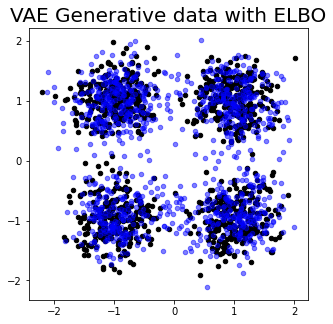

In [24]:
# Train with ELBO, and visualize 
# Most arguments of the following functions have reasonable default settings, i list them all here for a pedagogical reason
elbo_vae_instance = utils.train_ELBO_VAE_batched(x_train, 
                                                 x_var=x_var,
                                                 z_dim=2,
                                                 width=50,
                                                 hidden_layers=1,
                                                 learning_rate=0.01,
                                                 S=10,
                                                 n_epochs=5000,
                                                 report_iter=50,
                                                 batch_size=256,
                                                 device=device)
utils.visualize_VAE(elbo_vae_instance, 
                    x_train, 
                    "ELBO", 
                    x_var=x_var,
                    number_samples=1000,
                    figsize=(5,5))

100%|██████████| 5000/5000 [00:50<00:00, 99.55it/s] 


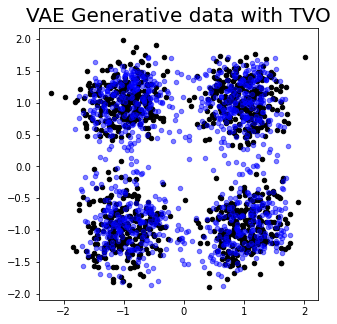

In [25]:
# Train with TVO, and visualize 
tvo_vae_instance = utils.train_TVO_VAE_batched(x_train,
                                                x_var=x_var,
                                                z_dim=2,
                                                width=50,
                                                hidden_layers=1,
                                                learning_rate=0.01,
                                                partition=torch.tensor([0.0,0.25,0.50,0.75,1.0]),
                                                S=10,
                                                n_epochs=5000,
                                                report_iter=50,
                                                batch_size=256,
                                                device=device)
utils.visualize_VAE(tvo_vae_instance,
                    x_train, 
                    "TVO",
                    x_var=x_var,
                    number_samples=1000, 
                    figsize=(5,5))

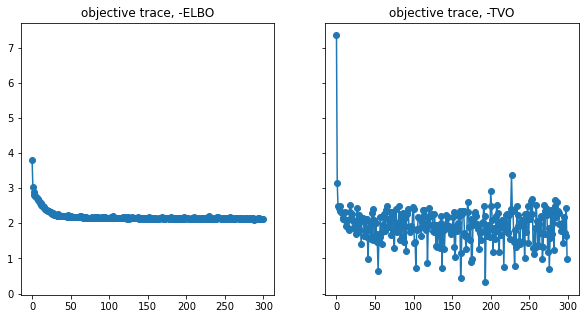

In [26]:
# Plot out the loss function trace
fig, ax=plt.subplots(1,2, figsize=(10,5), sharey=True)
ax[0].plot(elbo_vae_instance.objective_trace, 'o-')
ax[0].set_title('objective trace, -ELBO')
ax[1].plot(tvo_vae_instance.objective_trace, 'o-')
ax[1].set_title('objective trace, -TVO')
plt.show()